In [2]:
import pandas as pd

df = pd.read_csv('news.csv',encoding='utf-8')

In [3]:
# check the df for null values
df.isnull().sum()
# remove null values
df = df.dropna()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['content'], df['topic'], test_size=0.1, random_state=36)

In [6]:
X_train.head()

242    Reacting to the song, a fan wrote, "I loooooov...
374    The beloved ‘97 liner squad appears to have be...
785    Stray Kids is a popular South Korean boy band ...
800    aespa will appear at the New York representati...
169    BTS members are popular across the globe. They...
Name: content, dtype: object

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

In [9]:
import string 
s =  set(string.punctuation) 
s.add('\'')
s.add('n\'t')
# remove punctuation
def remove_punctuation(tokens):
    words = [word for word in tokens if word not in s]
    return words

In [10]:
def stem(token):
    ps = PorterStemmer()
    return ps.stem(token)

In [11]:
stop_words = set(stopwords.words('english'))
# print(stop_words)
def remove_stopwords(tokens):
    words = [word for word in tokens if word not in stop_words]
    words = [word if word[0]!='\'' else word[1:] for word in words]
    words = [word if word[-1]!='\'' else word[:-1]  for word in words]
    words = [word for word in words if (len(word)>2 and word.isalpha())]
    return words

In [16]:
import math

In [35]:
res=[]
dfre={}
# Calculate document frequency of each word in X_train
for i in range(len(X_train)):
    text=X_train.iloc[i].lower()
    tokens=tokenize(text)
    words=remove_punctuation(tokens)
    words=remove_stopwords(words)
    words=list(set(words))
    for word in words:
        if word not in dfre:
            dfre[word]=1
        else:
            dfre[word]+=1
# calculate tf of each word in each row of X_train
for i in range(len(X_train)):
    tf={}
    text=X_train.iloc[i].lower()
    tokens=tokenize(text)
    words=remove_punctuation(tokens)
    words=remove_stopwords(words)
    for word in words:
        if word not in tf:
            tf[word]=words.count(word)
    x=0
    for word in tf:
        # print(dfre[word])
        x=x+(1+math.log10(tf[word]))*math.log10(len(X_train)/dfre[word])
    res.append(x)
        # res.append((word,(1+math.log(tf[word]))*math.log(len(X_train)/dfre[word])))

In [37]:
len(res)

725

In [39]:
res

[1662.1780926382648,
 635.2475307420108,
 629.3522540254353,
 612.9360924903809,
 584.0967402720943,
 571.6362538594267,
 566.0433298178125,
 553.3605699740829,
 548.0973489736235,
 546.0087554111601,
 545.9854023741199,
 537.8826358439155,
 531.6366320203653,
 527.981494464364,
 527.7144902266139,
 522.4312229642227,
 516.8309660277139,
 515.4408128511038,
 504.3600019258686,
 501.84273182955127,
 497.9486124959668,
 495.836826249857,
 495.6823682077189,
 488.2789557075877,
 482.87959486459306,
 482.6268278310508,
 479.41412901886366,
 479.30845018493636,
 477.45052539728727,
 472.51111790928064,
 468.62354585780633,
 467.4598968044131,
 462.3345766970763,
 461.0690244671891,
 460.5457754368891,
 459.8180789118,
 456.9271741744978,
 455.9545457740374,
 450.9935525687159,
 449.5795424390251,
 448.3535701806486,
 448.0546639293704,
 447.6448797024651,
 444.92104913431075,
 444.0114458906765,
 443.9187601887479,
 442.09383739402216,
 440.9359072047325,
 437.2528488388938,
 436.3043548016

In [38]:
res=sorted(res,  reverse=True)
index_50th_percentile = int(len(res) * 0.5)
value_at_50th_percentile = res[index_50th_percentile]
value_at_50th_percentile

177.71483982053064

In [53]:
for i in range(len(X_test)):
    print(X_test.iloc[i])

Run BTS is South Korean boy group BTS&rsquo; variety show where they engage in various fun activities that bring out their real sides and give the fans aka the BTS ARMY to watch how these seven boys are just normal people, albeit with fabulous talent  While it is one of the most watched K-pop variety shows, which has gone on for years now, BTS announced in October 2021 that it will be taking a break  Earlier in the year, Run BTS made a return with a special episode edition which has now continued 

Fly BTS:
The aim of this episode is to make BTS take social media worthy photos  And the trick is that they need to learn how to do flying yoga poses  A special trainer is called in for the members as they stretch their muscles under the &lsquo;bora&rsquo;- purple, colored hammock 

The fast learners:
Member Jimin who is known to be the most flexible in the group is quick to grasp the core of the show as he easily mimics the steps  Youngest Jungkook is true to his Golden Maknae nickname, als

In [63]:
ans=[]
ans1=[]
rem=[]
rem1=[]
total=[]
for i in range(len(X_test)):
    tf={}
    text=X_test.iloc[i].lower()
    tokens=tokenize(text)
    words=remove_punctuation(tokens)
    words=remove_stopwords(words)
    for word in words:
        if word not in tf:
            tf[word]=words.count(word)
    x=0
    for word in tf:
        # print(word)
        if(word not in dfre):
            dfre[word]=1
        x=x+(1+math.log10(tf[word]))*math.log10(len(X_train)/(dfre[word]))
    if(x>value_at_50th_percentile):
        ans.append(X_test.iloc[i])
        ans1.append(x)
    else:
        rem.append(X_test.iloc[i])
        rem1.append(x)
    total.append(x)
# len(ans)

In [55]:
ans

['Run BTS is South Korean boy group BTS&rsquo; variety show where they engage in various fun activities that bring out their real sides and give the fans aka the BTS ARMY to watch how these seven boys are just normal people, albeit with fabulous talent  While it is one of the most watched K-pop variety shows, which has gone on for years now, BTS announced in October 2021 that it will be taking a break  Earlier in the year, Run BTS made a return with a special episode edition which has now continued \n\nFly BTS:\nThe aim of this episode is to make BTS take social media worthy photos  And the trick is that they need to learn how to do flying yoga poses  A special trainer is called in for the members as they stretch their muscles under the &lsquo;bora&rsquo;- purple, colored hammock \n\nThe fast learners:\nMember Jimin who is known to be the most flexible in the group is quick to grasp the core of the show as he easily mimics the steps  Youngest Jungkook is true to his Golden Maknae nickn

In [57]:
rem

["While the members of the Korean boy band BTS are known for their music, they are also known for their incredibly good looks. Be it Jimin, Jin, J-Hope or Jungkook - their fans love them for their good looks and swoon over them like there's no tomorrow. Well, ARMY (as BTS fans are known) are currently going gaga over Jimin's latest photoshoot. He has posed for W Korea and is looking incredibly handsome as always. Jimin's pictures have gone viral on social media with his fans lauding his model avatar Jimin's W photoshoot includes some monochromatic pictures with him giving some intense gaze. He is dressed in Dior and can be seen surrounded by flowers. His side profile too has got his fans go crazy over him. Some even called him a piece of 'art' Well, there is no doubt that Jimin is one handsome boy who can make any girl swoon over his looks Meanwhile, the new poster of song Vibe is also out. Jimin will be collaborating with Taeyang for this one. Needless to say that he looks dashing in 

In [58]:
import matplotlib.pyplot as plt

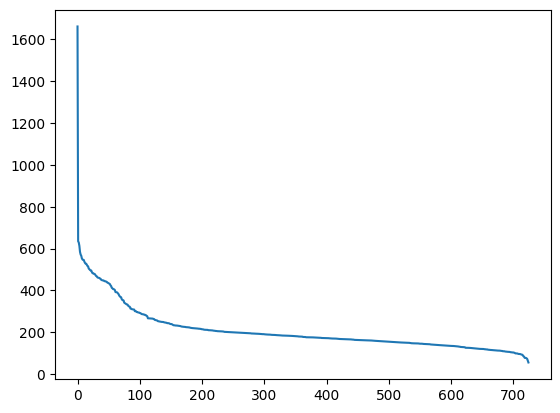

In [59]:
plt.plot(res)

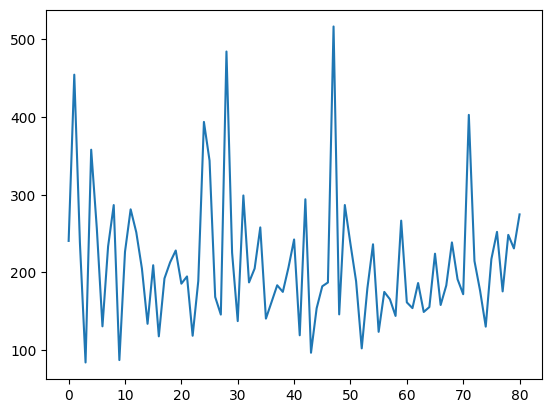

In [62]:
plt.plot(total)

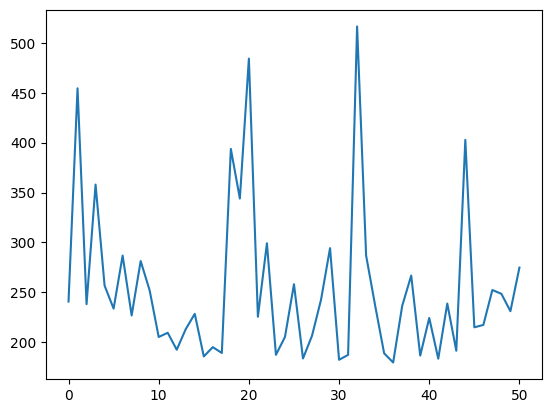

In [65]:
plt.plot(ans1)

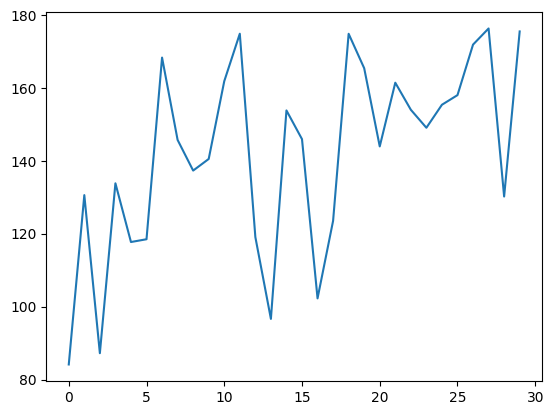

In [66]:
plt.plot(rem1)